In [159]:
# Technical Assessment – Exploratory Data Analysis

In [160]:
import pandas as pd
import numpy as np
df_ = pd.read_csv("C:/Users/admin/Downloads/pima_diabetes_dataset.csv")
df = df_.copy()

In [161]:
# Check, examine the data

In [162]:
def data_read(dataframe):
    print("-" *40)
    print("OUTLINE", dataframe.shape)
    print("-" *20)
    print(dataframe.columns)
    print("-" *40)
    print(dataframe.head())
    print("-" *20 + "DATA DESCRIPTION"+ "-" *20 )
    print(dataframe.dtypes)
    

In [163]:
data_read(df)

----------------------------------------
OUTLINE (768, 9)
--------------------
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
----------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
--------------------DA

In [164]:
# print the first 5 data 
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [165]:
# print(df.isnull().sum())
# check if the column have a zero val
(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [166]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan) # replace the zero values with the NAN -> specify for null

# count null values 
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [167]:
df.fillna(df.mean(), inplace=True) # replace the null value with the mean valu

In [168]:
# added bmi status
bmi_status = pd.Series([]) 

for i in range(len(df)): 
    if df['BMI'][i] == 0.0: 
        bmi_status[i]="N/A"
    elif df['BMI'][i] < 18.5: 
        bmi_status[i]="Underweight"
    elif df['BMI'][i] < 25: 
        bmi_status[i]="Normal"
  
    elif df['BMI'][i] >= 25 and df['BMI'][i] < 30: 
        bmi_status[i]="Overweight"
    elif df['BMI'][i] >= 30: 
        bmi_status[i]="Obese"
    else: 
        bmi_status[i]= df['BMI'][i] 

In [169]:
df.insert(6, "BMI_Status", bmi_status)

In [170]:
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   BMI_Status  DiabetesPedigreeFunction  Age  Outcome  
0       Obese                     0.627   50        1  
1  Overweight                     0.351   31        0  
2      Normal                     0.672   32        1  
3  Overweight                     0.167   21        0  
4       Obese                     2.288   33        1  


In [171]:
df['BMI_Status'].value_counts()

BMI_Status
Obese          483
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64

In [172]:
df = df.drop('BMI_Status', axis=1)
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [173]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


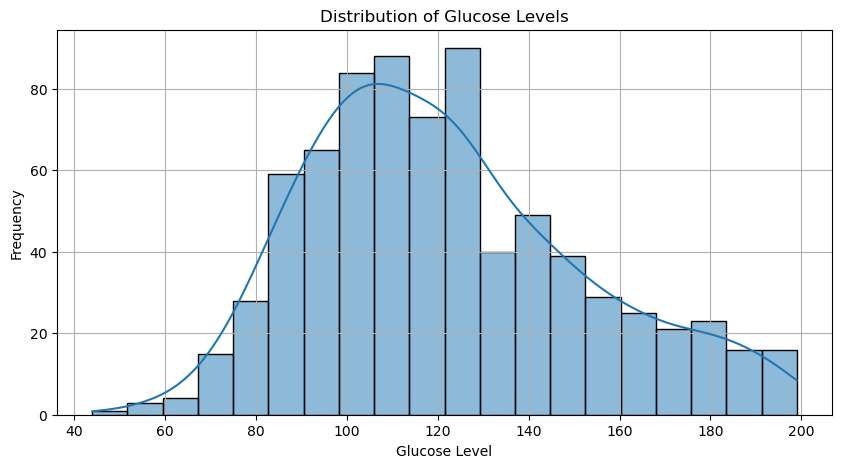

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
# sns.histplot(df['Glucose'], kde=True)
# plt.title("Distribution of Glucose Levels")
# plt.show()

#4

plt.figure(figsize=(10, 5))
sns.histplot(df['Glucose'], kde=True, bins=20)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

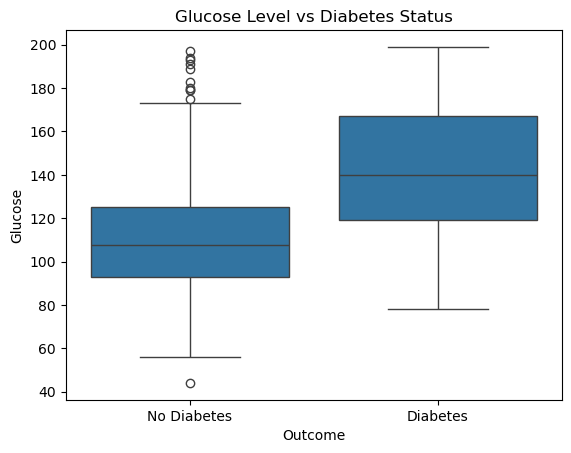

In [175]:

sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Level vs Diabetes Status")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

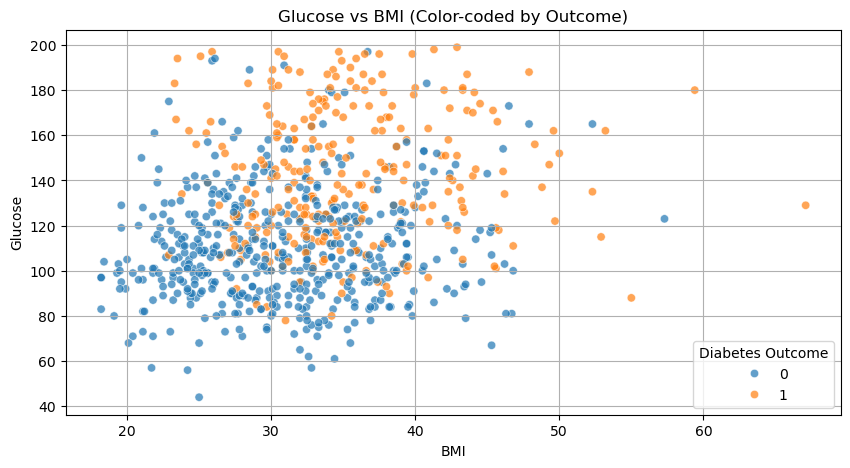

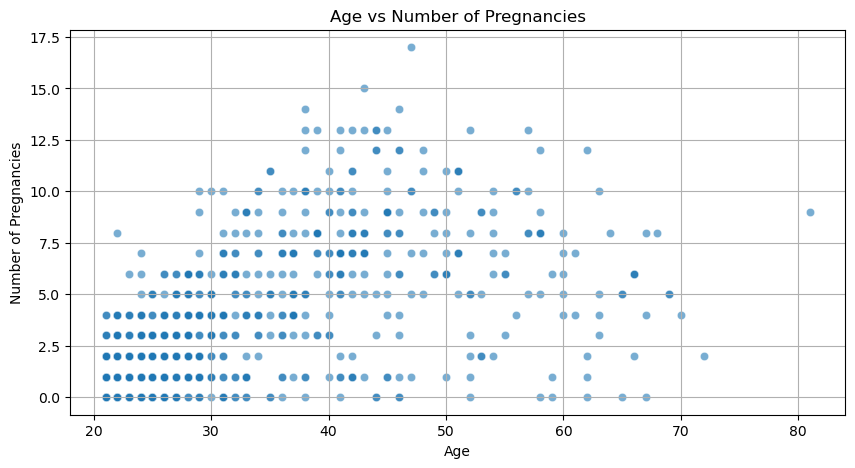

In [176]:
# Scatter plot: Glucose vs BMI
plt.figure(figsize=(10, 5))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df, alpha=0.7)
plt.title("Glucose vs BMI (Color-coded by Outcome)")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(title="Diabetes Outcome")
plt.grid(True)
plt.show()

# Scatter plot: Age vs Pregnancies
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Pregnancies', data=df, alpha=0.6)
plt.title("Age vs Number of Pregnancies")
plt.xlabel("Age")
plt.ylabel("Number of Pregnancies")
plt.grid(True)
plt.show()

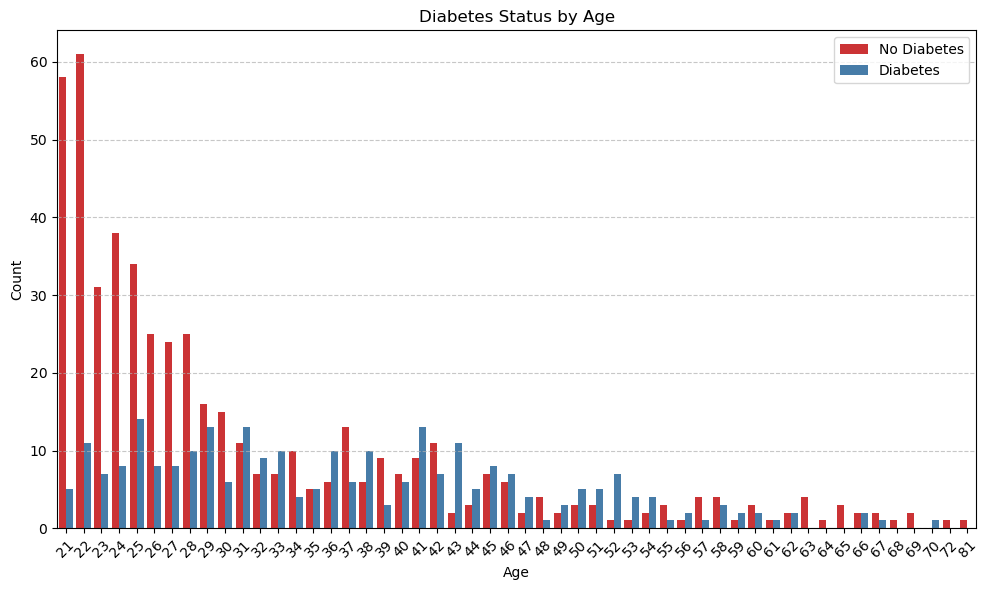

In [177]:
# sns.countplot(data=df, x='Age', hue='Outcome')
# plt.title("Age vs Diabetes")
# plt.legend(['No Diabetes', 'Diabetes'])
# plt.xticks(rotation=90) 
# plt.tight_layout()
# plt.show()

# 5 and 6

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age', hue='Outcome', palette="Set1")
plt.title("Diabetes Status by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




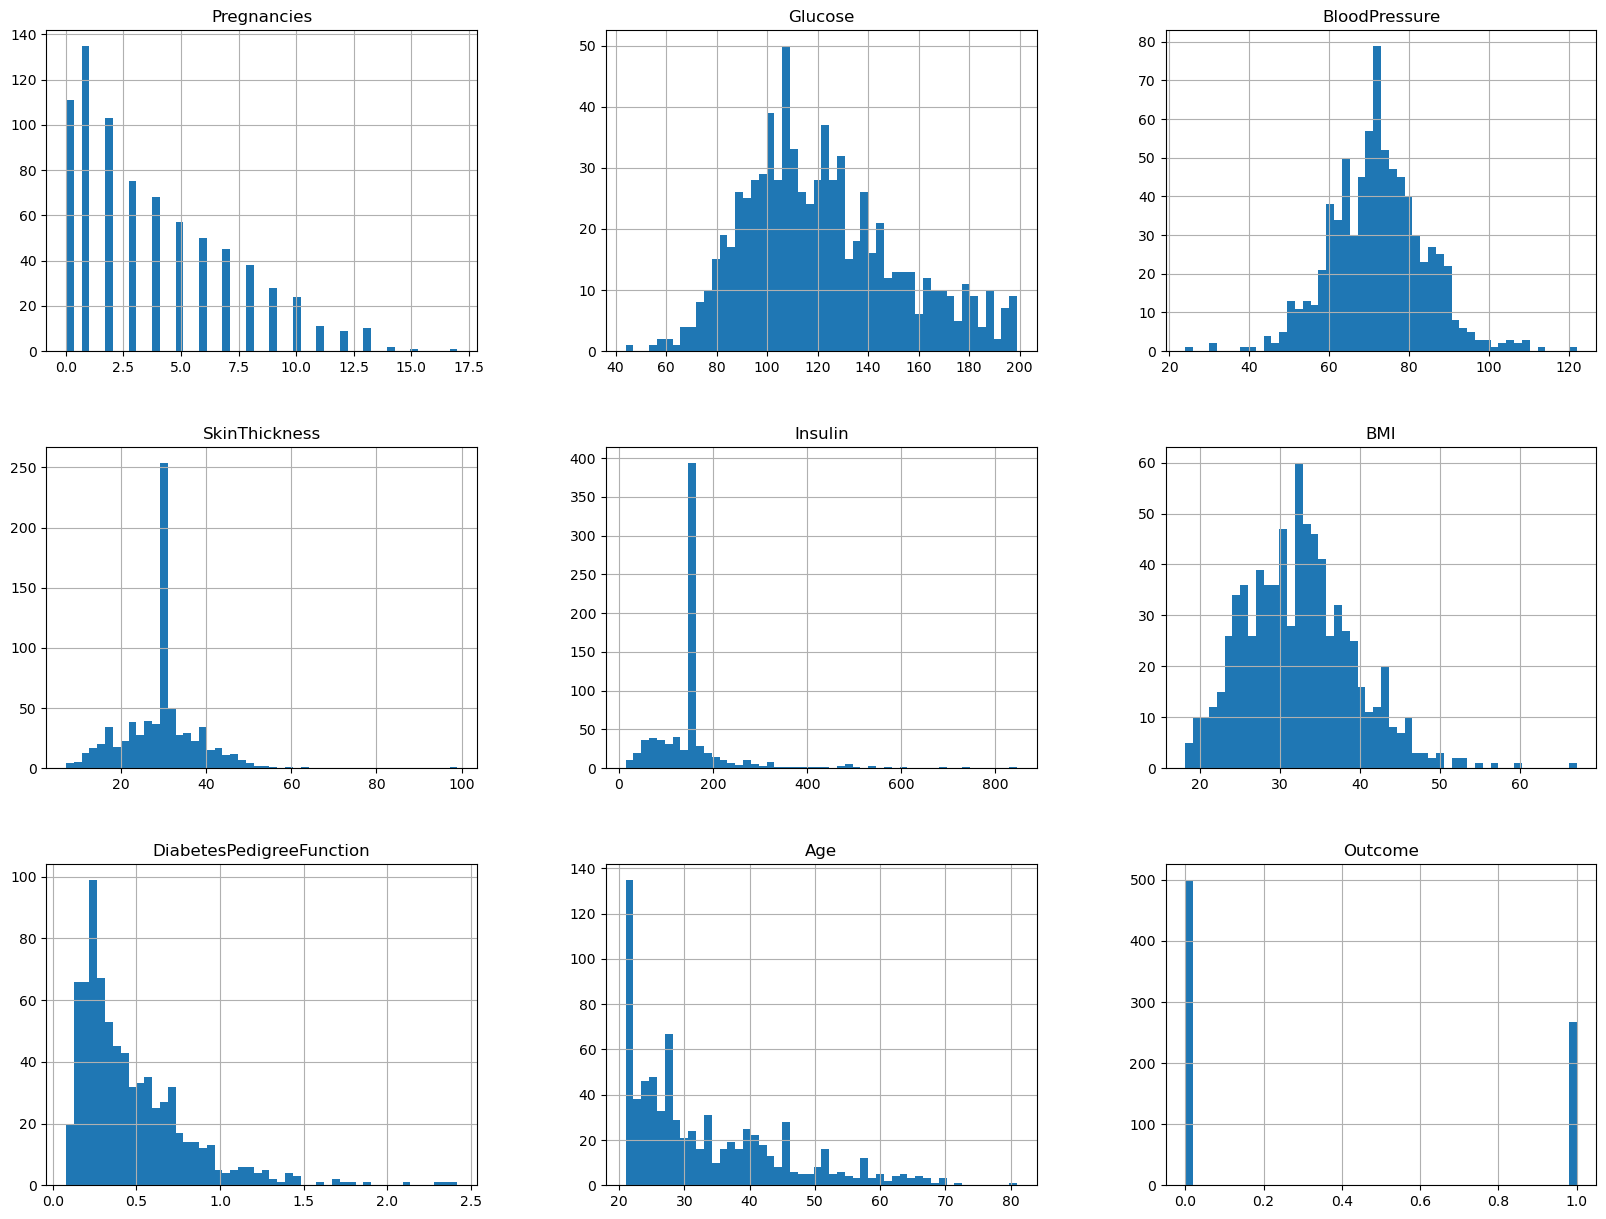

In [178]:
# Histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [181]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [182]:
df.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [183]:
df.max

<bound method DataFrame.max of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome 

Standard Deviations of Features:
Pregnancies                  3.369578
Glucose                     30.435949
BloodPressure               12.096346
SkinThickness                8.790942
Insulin                     85.021108
BMI                          6.875151
DiabetesPedigreeFunction     0.331329
Age                         11.760232
Outcome                      0.476951
dtype: float64


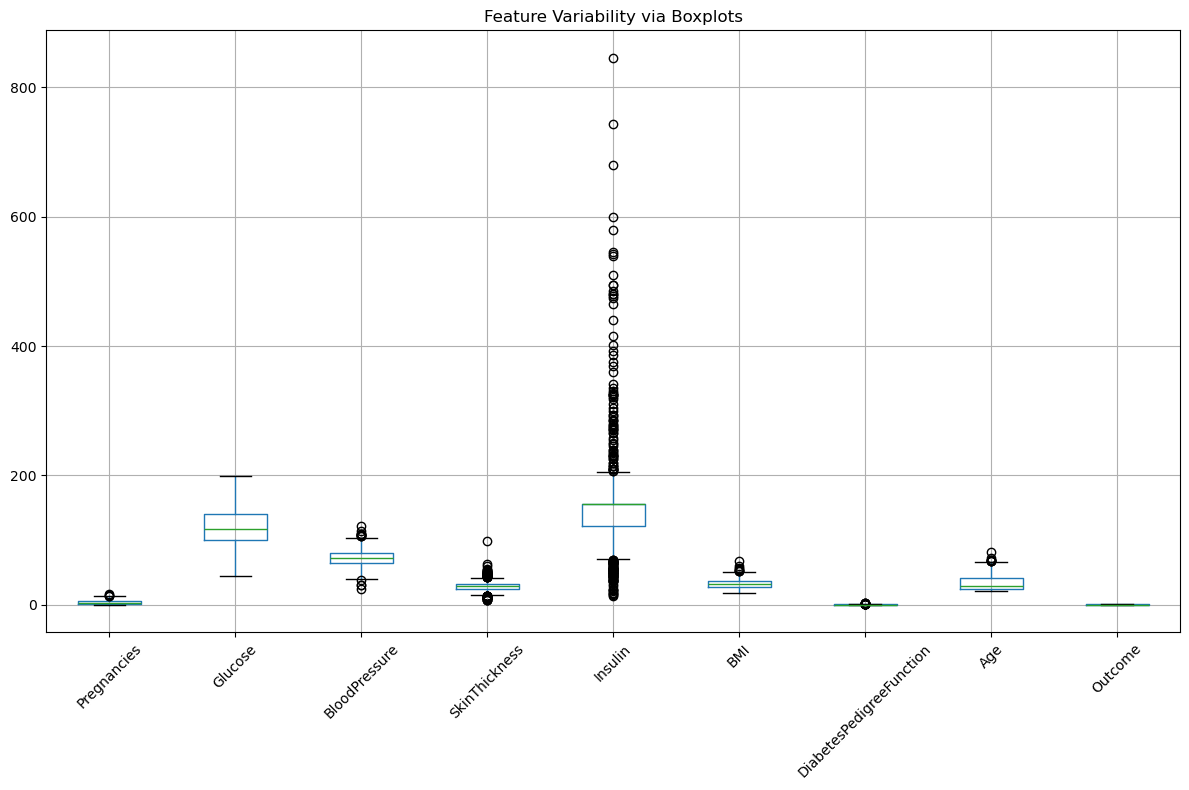

In [184]:
# Standard deviations
print("Standard Deviations of Features:")
print(df.std())

#7

plt.figure(figsize=(12, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Feature Variability via Boxplots")
plt.tight_layout()
plt.show()

In [185]:
# sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df)

In [186]:
df.groupby('Outcome')['Age'].mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

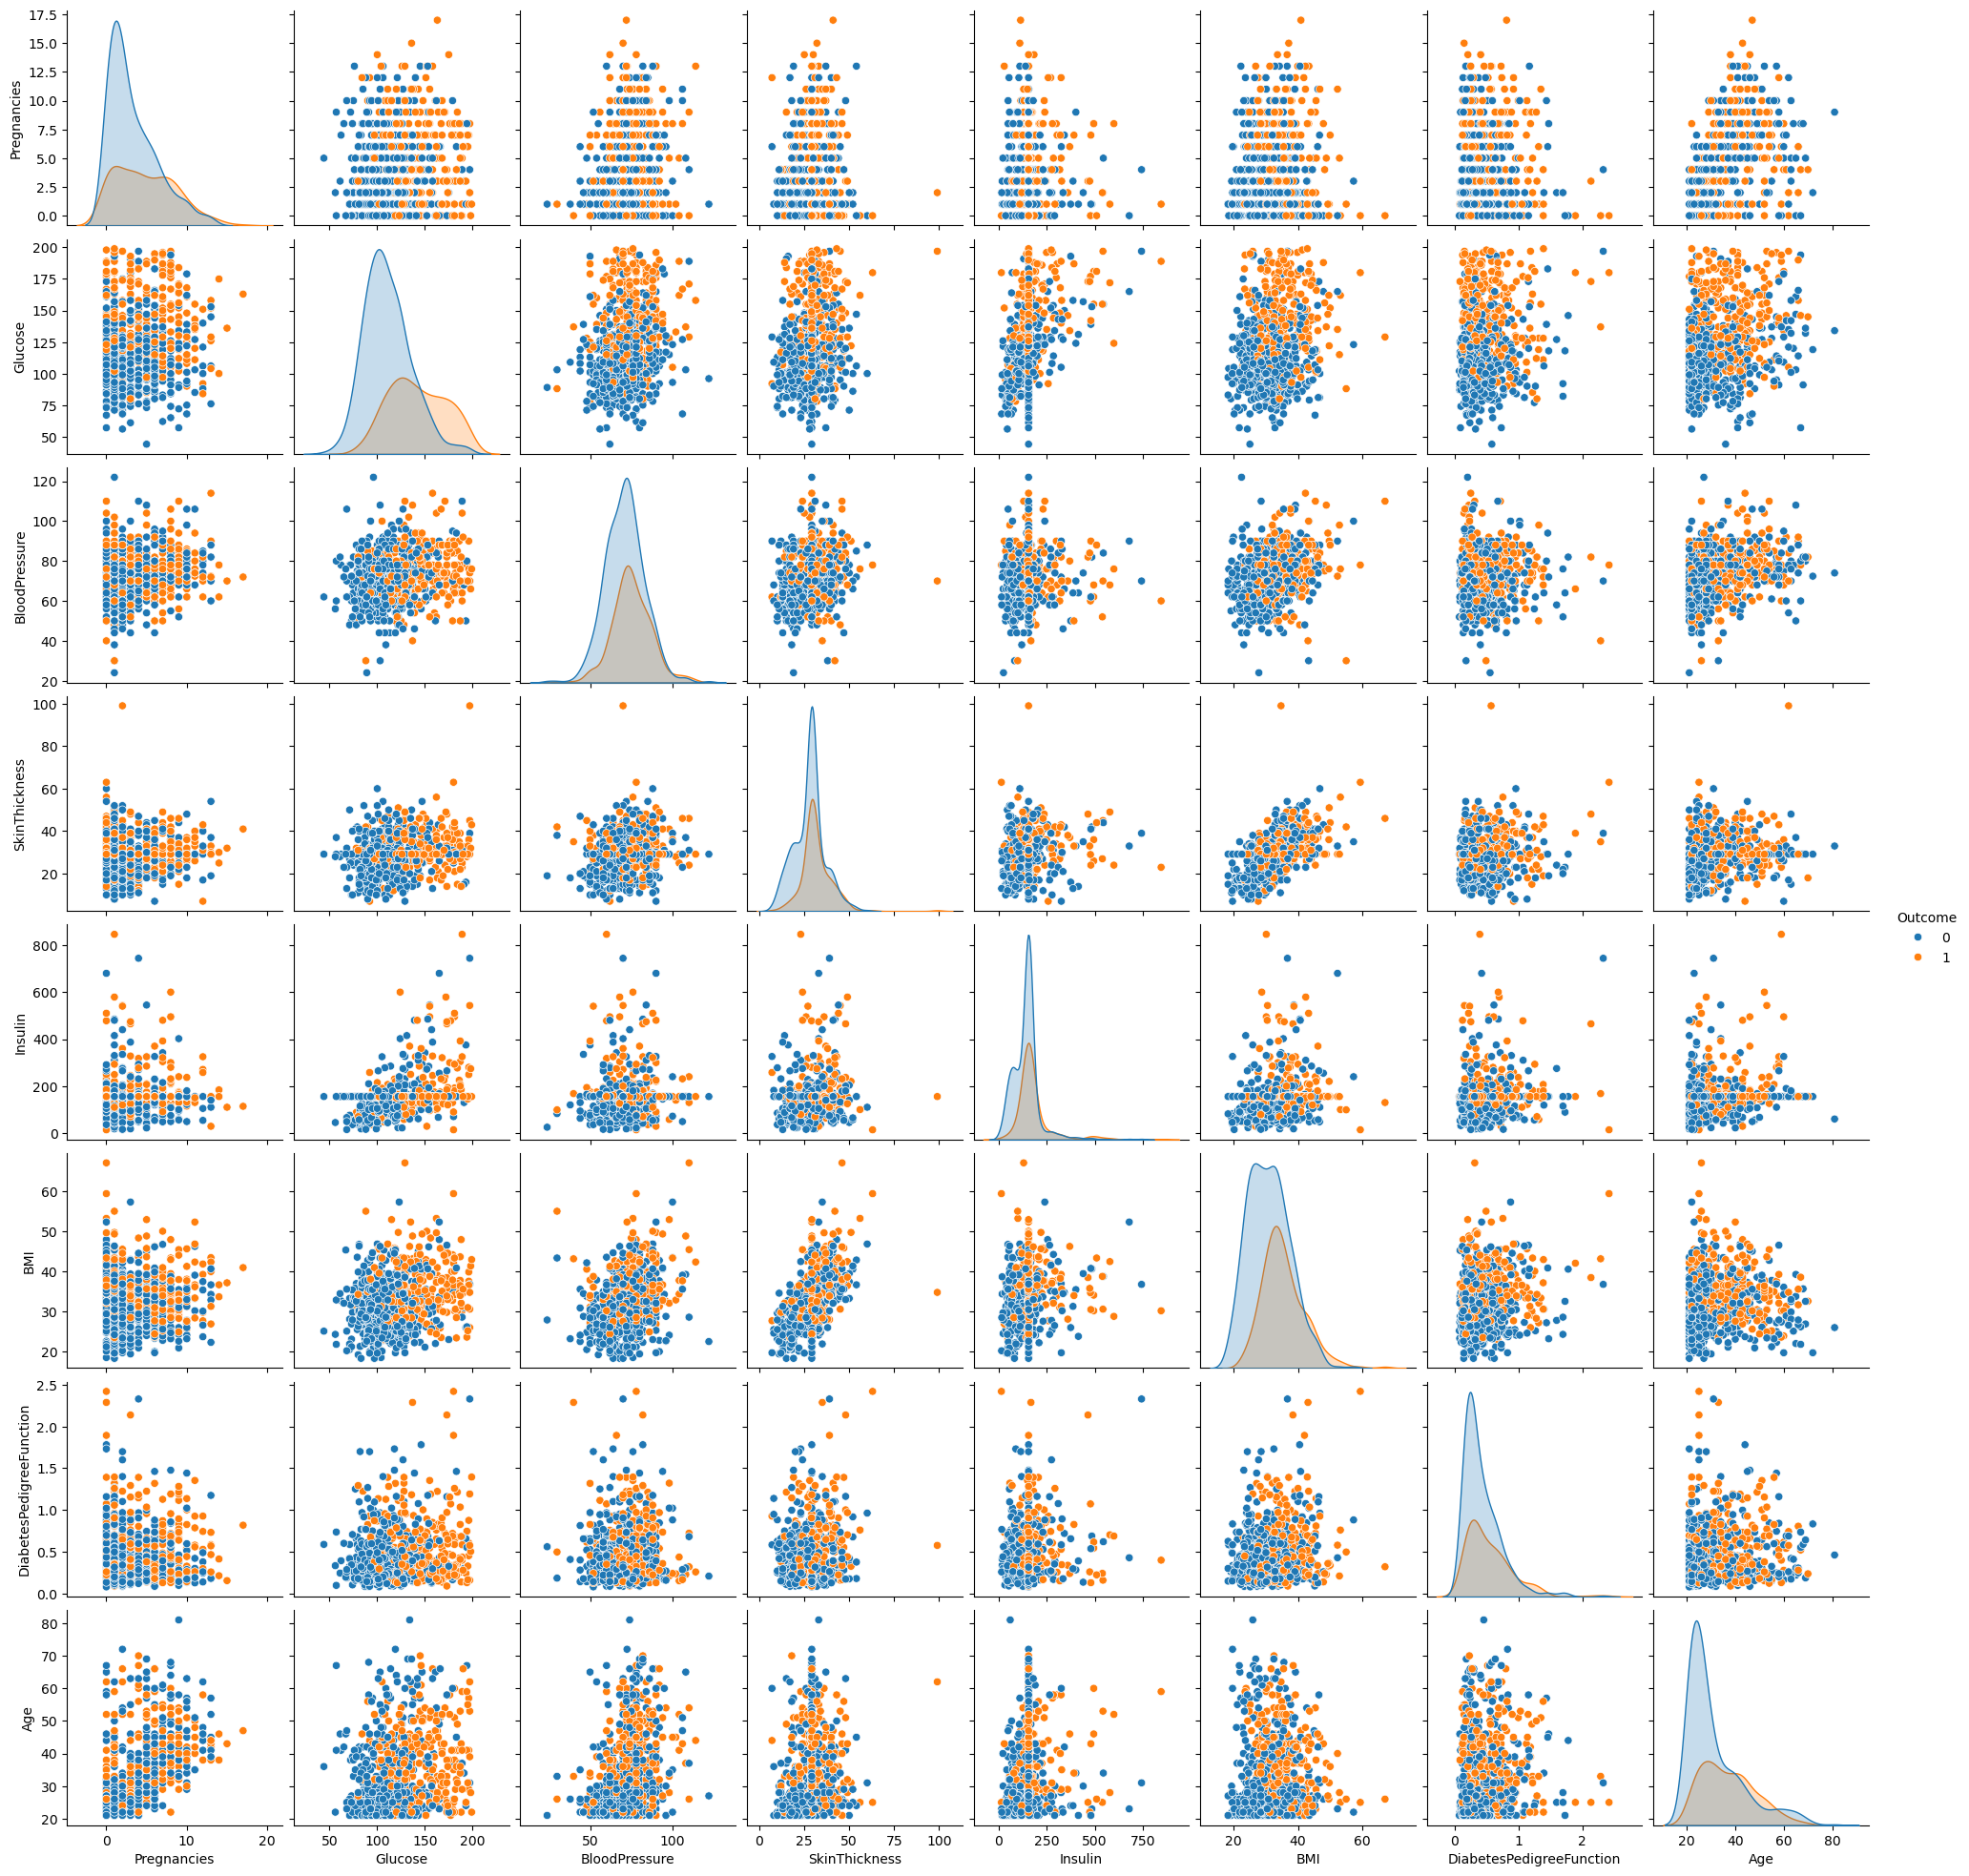

In [187]:
sns.pairplot(df, hue='Outcome')

In [188]:
#  using matrix for number 8

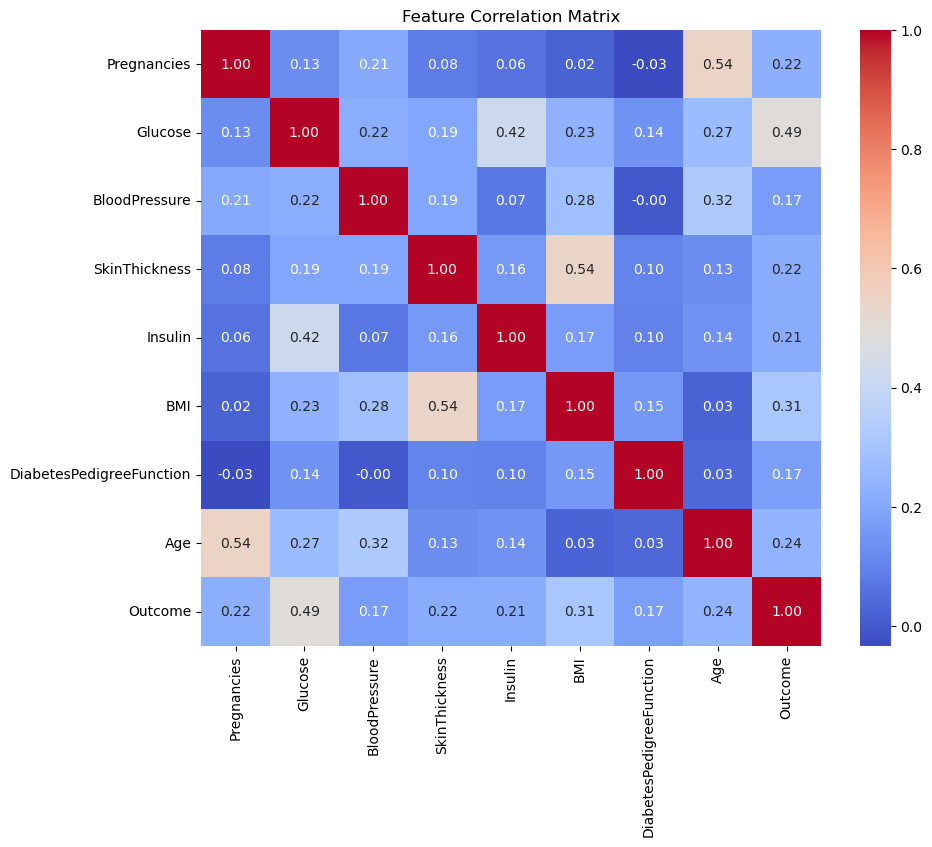

In [189]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [190]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64